In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#
# Load Dataset
#

df = pd.read_csv("/content/Bank_churn.csv")

df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [80]:
#
# Convert String values to numerical values
#

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

for column in df.columns:
    dataType = df[column].dtype

    if(dataType == 'object'):

        # Fit and transform the data
        df[column] = encoder.fit_transform(df[column])

df


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


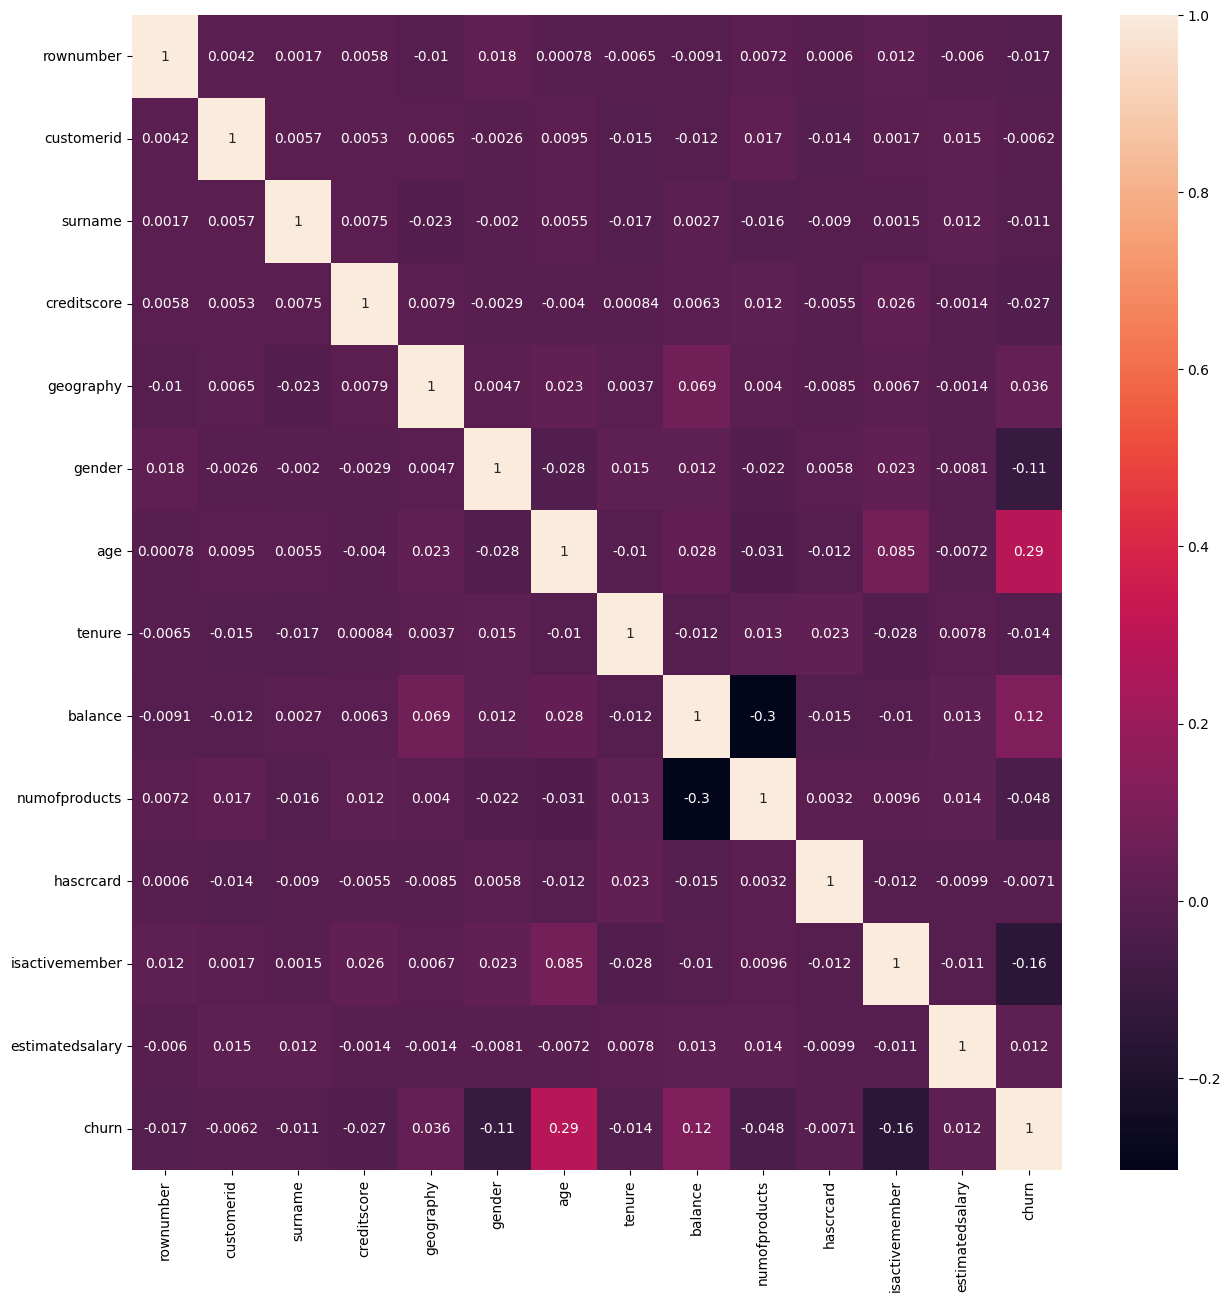

In [82]:
#
# Find Feature Selection
#
new_df = df

plt.figure(figsize=(15, 15))

corrMatrix = new_df.corr()

# Plotting correlation heatmap
dataplot = sns.heatmap(new_df.corr(), annot=True)


# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Get the absolute correlation values with respect to 'churn'
churn_correlation = correlation_matrix['churn'].drop('churn')  # Drop 'churn' itself

# Sort the features by correlation
# Select the top 4 positively correlated features
# Select the top 4 positively correlated features
top_positive_features = churn_correlation.nlargest(4).index.tolist()
top_negative_features = churn_correlation.nsmallest(4).index.tolist()

# Combine top positive and top negative features
top_features = top_positive_features, top_negative_features




In [83]:
# Extract the new features
new_features = []
for i in range(len(top_features)):
  feature = top_features[i]
  for new in feature:
    new_features.append(new)

new_features

['age',
 'balance',
 'geography',
 'estimatedsalary',
 'isactivemember',
 'gender',
 'numofproducts',
 'creditscore']

In [84]:
# Combine the top features
new_df = df[new_features + ['churn']]
new_df

,age,balance,geography,estimatedsalary,isactivemember,gender,numofproducts,creditscore,churn
0,42,0.00,0,101348.88,1,0,1,619,1
1,41,83807.86,2,112542.58,1,0,1,608,0
2,42,159660.80,0,113931.57,0,0,3,502,1
3,39,0.00,0,93826.63,0,0,2,699,0
4,43,125510.82,2,79084.10,1,0,1,850,0
...,...,...,...,...,...,...,...,...,...
9995,39,0.00,0,96270.64,0,1,2,771,0
9996,35,57369.61,0,101699.77,1,1,1,516,0
9997,36,0.00,0,42085.58,1,0,1,709,1
9998,42,75075.31,1,92888.52,0,1,2,772,1


In [85]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Define target
target = 'churn'

# Split the data into features and target variable
X = df[new_features]
y = df['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Dictionary to hold accuracy scores
accuracy_scores = {}

print("\n")

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")




Logistic Regression Accuracy: 0.80
Decision Tree Accuracy: 0.80
Random Forest Accuracy: 0.87
Support Vector Machine Accuracy: 0.80


In [86]:
# Identify the model with the highest accuracy
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with accuracy {accuracy_scores[best_model_name]:.2f}")

# Evaluate the best model further
y_pred_best = best_model.predict(X_test)
print("\nClassification Report for the Best Model:")
print(classification_report(y_test, y_pred_best))


Best Model: Random Forest with accuracy 0.87

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [87]:
# Create requirements.txt file
requirements = """
pandas
scikit-learn
numpy
matplotlib
warnings
seaborn
"""

# Write to requirements.txt
with open('requirements.txt', 'w') as f:
    f.write(requirements.strip())

# List files to verify creation
!ls

Bank_churn.csv	requirements.txt  sample_data  Telco-Customer-Churn.csv
